In [4]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [7]:
read = emcee.backends.HDFBackend("/home/carlos/Documents/Lens_Simulation.h5")

In [8]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [9]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

271.54104987829834


In [10]:
#parameters of best walker
best_walker = chain[best_log][1]

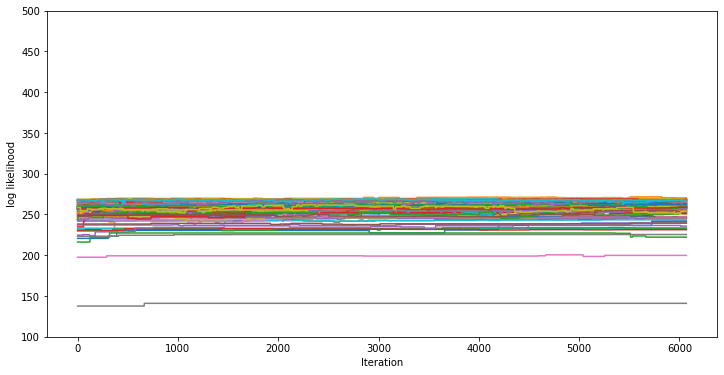

In [11]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(100, 500)
    plt.xlim()
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

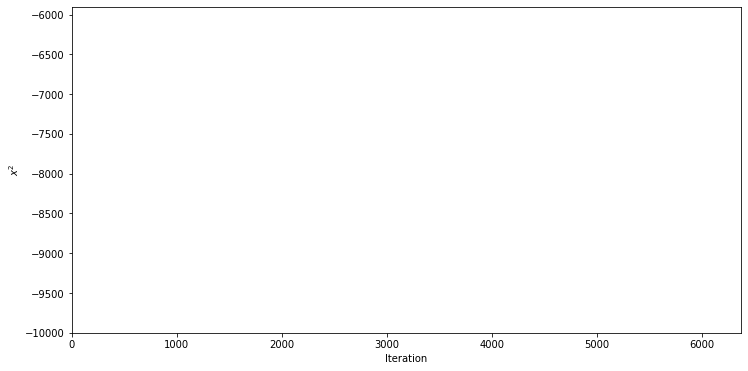

In [12]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5900)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [13]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([ 14., 152., 242., 249.,   8., 262., 241.,   9.,  66., 274., 279.,
        34.,  71., 231.,  77.,  31., 219.,  95., 170.,   9., 110., 177.,
       199., 164.,  88., 105.,  86., 221.,  24., 241., 101.,  87., 148.,
       127., 225., 144., 240.,  34.,   7.,  22.,   9., 273., 209., 209.,
        79.,  81., 175.,  18.,  61., 182., 212., 217., 139., 100.,  64.,
       127., 122.,  85.,   9., 223.,  21.,  55., 104., 250., 308., 248.,
       310.,  79.,  55.,   4.,  41., 194.,  37.,  33.,  29.,   7.,  63.,
       172.,  30., 226.,  63., 130.,   7., 157.,  55., 183., 146.,   6.,
       187.,  93.,  16.,  77.,  52.,  70.,  38., 241., 257., 278., 221.,
        97., 212.,  65.,  70., 167., 315.,  23.,  16., 263., 212.,  77.,
       161., 101.,  84.,  69., 270.,  20.,   7., 214., 239., 207.])

[1532.77106336 1532.42238284 1742.59226519 1707.74430569 1764.60016555
 1665.18762112 1673.00413913]
flat chain shape: (2203800, 7)
flat log prob shape: (2203800,)


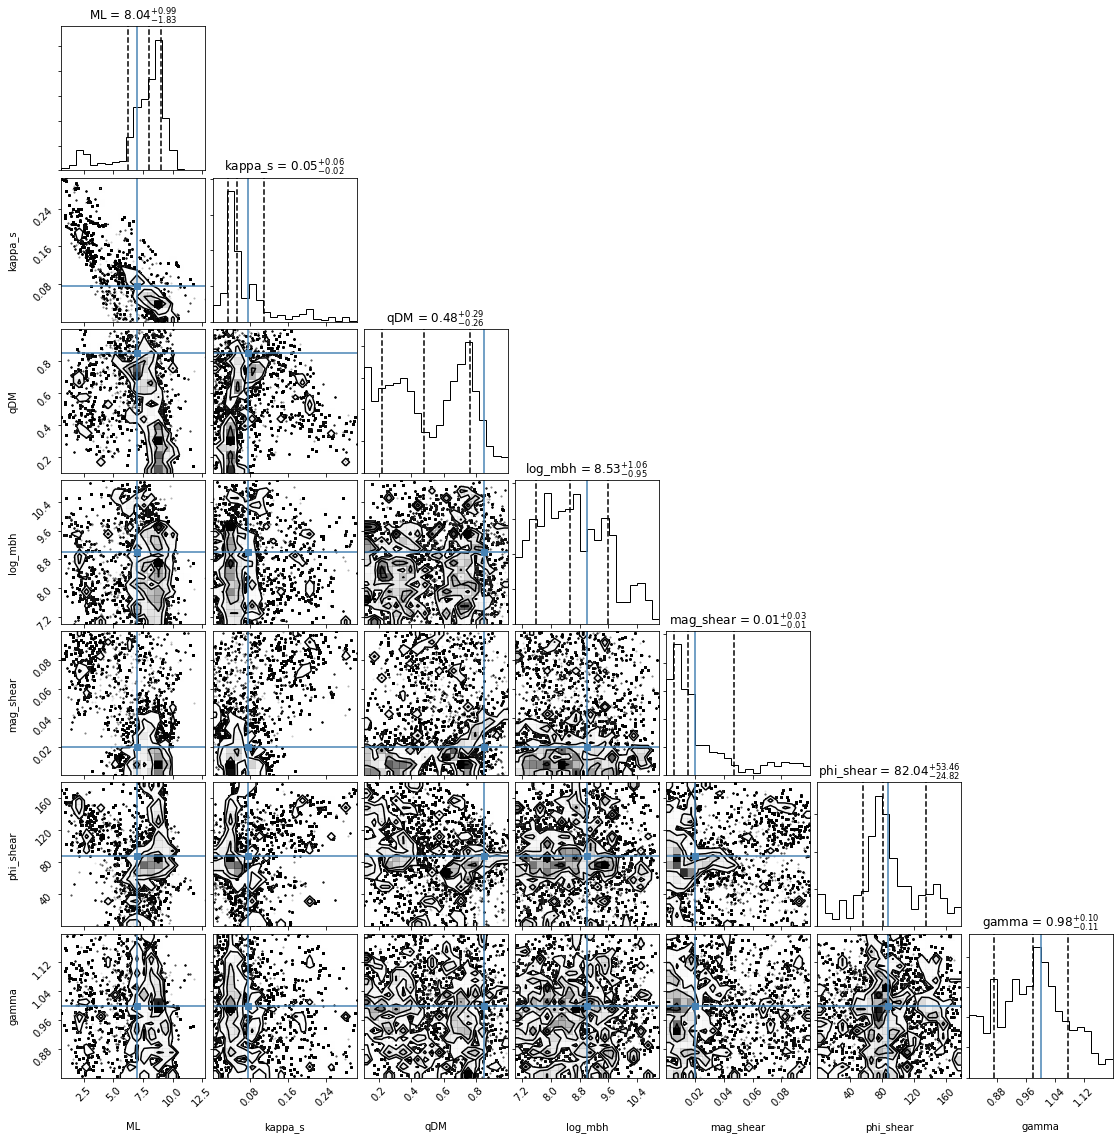

In [8]:
#Corner plots

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]
truth = [7.00, 0.075, 0.85, 9.00, 0.02, 88.0, 1.00]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, truths=truth);

1291 322
flat chain shape: (1680, 7)
flat log prob shape: (1680,)


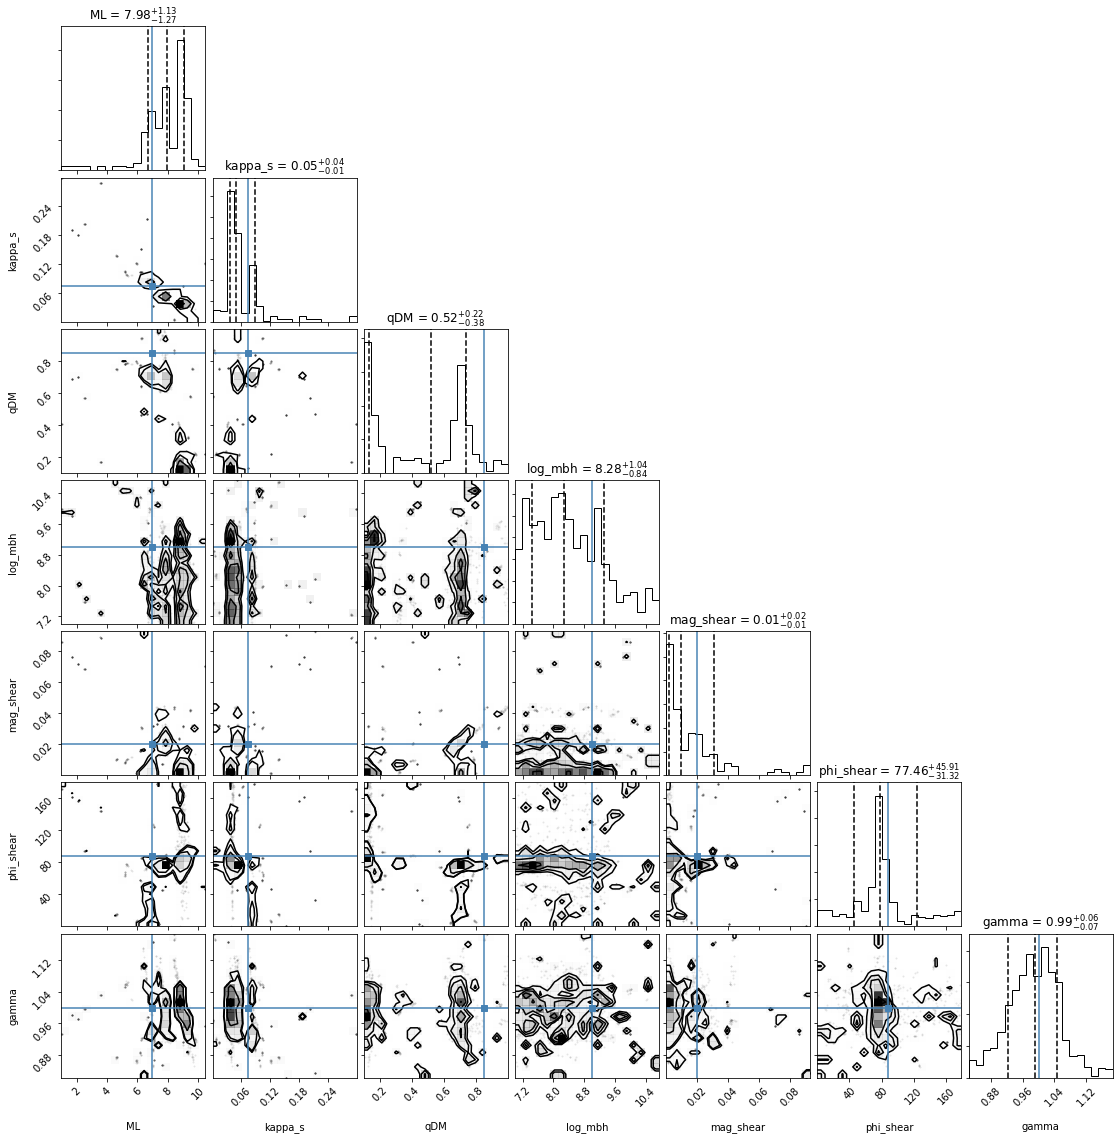

In [14]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)
truth = [7.00, 0.075, 0.85, 9.00, 0.02, 88.0, 1.00]

labels = ["ML", "kappa_s", "qDM", "log_mbh", "mag_shear", "phi_shear", "gamma"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, truths=truth);

In [15]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(7):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
tau = read.get_autocorr_time(tol=0)
print(tau, read.iteration/50)

[643.80035762 598.97388814 630.29098503 592.27785785 633.94821511
 645.98806886 640.85660901] 121.4


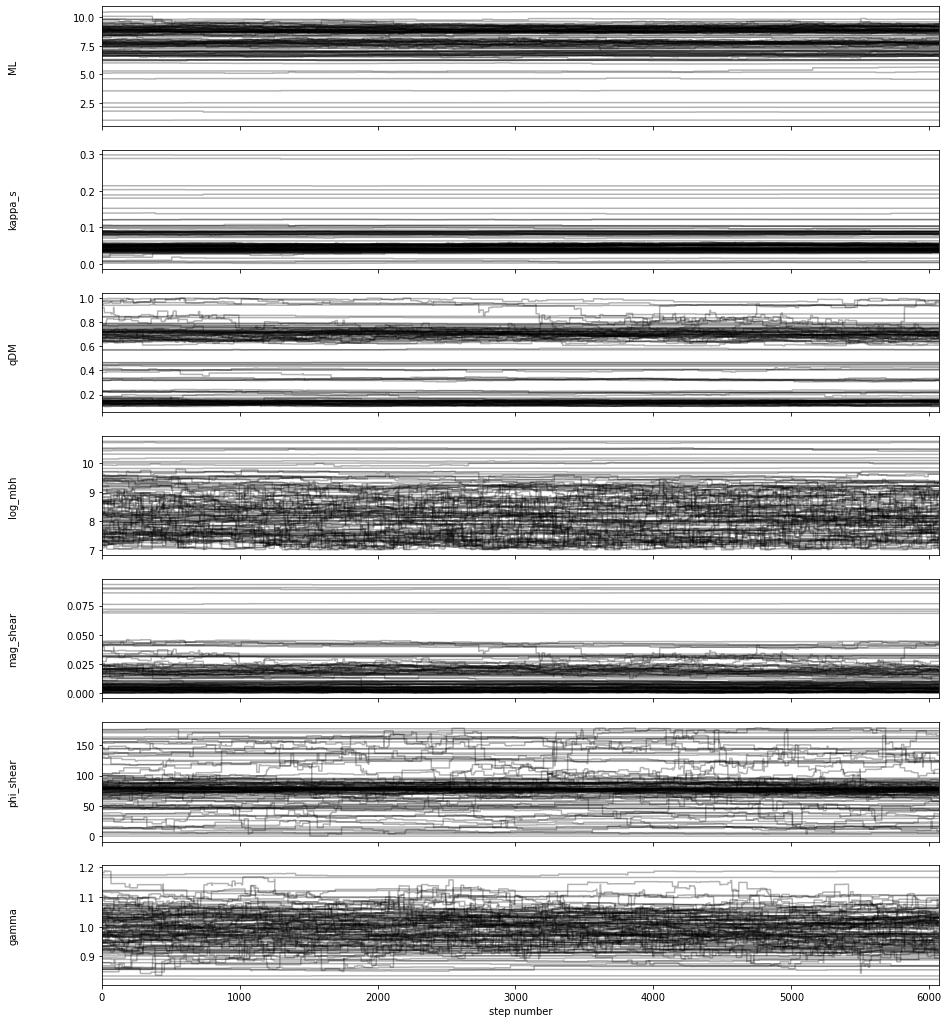

In [17]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [12]:
it, accep_tot, time, accep_100 = np.loadtxt("Input/Output_LogFile.txt", unpack=True)

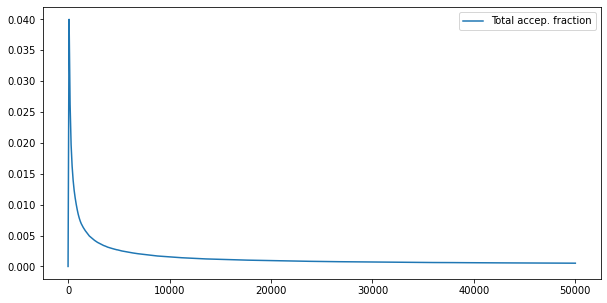

In [13]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

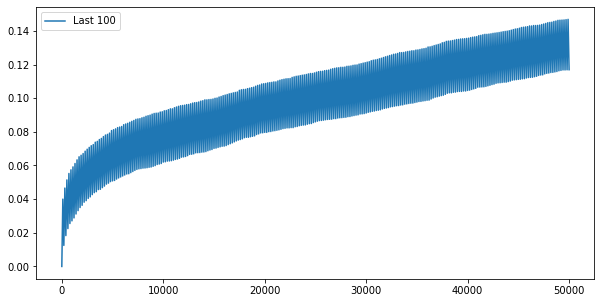

In [15]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100")
plt.legend()

## Plot Model Best-Fit

In [18]:
#Control time packages
import time
import os
os.environ["OMP_NUM_THREADS"] = "1"

#MPI
from schwimmbad import MPIPool

#General packages
import numpy as np
import emcee
import matplotlib.pyplot as plt

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
from astropy.constants import G, M_sun, c
import astropy.units as u

#Autolens Model packages
import autolens as al
import autolens.plot as aplt

#My Emcee for Pyautolens
import My_Autolens

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_5/Simulation_Data/"

In [19]:
#Reading MGE inputs
surf_lum, sigma_lum, qobs_lum = np.loadtxt("Input/JAM_Input.txt", unpack=True)      #MGE decomposition
surf_dm, sigma_dm , qobs_dm   = np.loadtxt("Input/eNFW.txt", unpack=True)             #DM component

## Models inicialization

"""
    To inicialize the model, we set some random values for the parameters. But it's only necessary for initialize the model. During the non-linear search, this values will be updated constantly until the best fit.
"""  
#Only for lensing modelling 
z_l    = 0.299                                                         #Lens Redshift
z_s    = 4.100                                                         #Source Redshift 
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to lens [Mpc] 
mbh    = 1e9                                                           #mass of black hole [log10(M_sun)]
kappa_ = 0.075                                                         #kappa_s of DM profile
ml     = 7.00                                                          #mass to light ratio
r_s    = 11.5                                                          #scale radius [arcsec]
shear_comp = al.convert.shear_elliptical_comps_from(magnitude=0.02, phi=88) #external shear


#Autolens Data
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )

mask        = al.Mask.from_fits( file_path=f"{data_folder}/new_mask.fits", hdu=1, 
                                pixel_scales=imaging.pixel_scales)

masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)   #Masked image
#aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

#--------------------------------------------------------------------------------------------------#
# PYAUTOLENS MODEL
#MGE mass profile
mass_profile = al.mp.MGE()    #Mass class

ell_comps    = al.convert.elliptical_comps_from(axis_ratio=qobs_dm[0], phi=0.0) #Elliptical components in Pyautolens units
eNFW         = al.mp.dark_mass_profiles.EllipticalNFW(kappa_s=kappa_, elliptical_comps=ell_comps ,scale_radius=r_s) #Analytical eNFW profile


#Components
#Do not include MGE DM component here
mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                       surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml, mbh=mbh) 
mass_profile.Analytic_Model(eNFW)  #Include Analytical NFW
emcee_model = My_Autolens.Models(mass_profile=mass_profile, masked_imaging=masked_image, quiet=False)
emcee_model.include_DM_analytical(eNFW)

## Best Model

In [20]:
p0 = best_fit
p0

array([7.97565700e+00, 5.05949823e-02, 5.19161255e-01, 8.28368506e+00,
       9.42699059e-03, 7.74618448e+01, 9.89929463e-01])

ParsDic:
#------------------------------------#
{'ml': 7.975657001654304, 'kappa_s': 0.05059498228952743, 'qDM': 0.5191612545791066, 'log_mbh': 8.283685058091695, 'mag_shear': 0.009426990592188433, 'phi_shear': 77.46184484436428, 'gamma': 0.9899294631427913}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.3165159353370376)
axis_ratio: 0.5191612545791067
phi: 0.0
kappa_s: 0.05059498228952743
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: -372.8936283284239
Log Normalization -1317.2315249194833
Log Evidence: -1181.8343942558236
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 0.9899294631427913
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.3165159353370376)
axis_ratio: 0.5191612545791067
phi: 0.0
kappa

<Figure size 720x720 with 0 Axes>

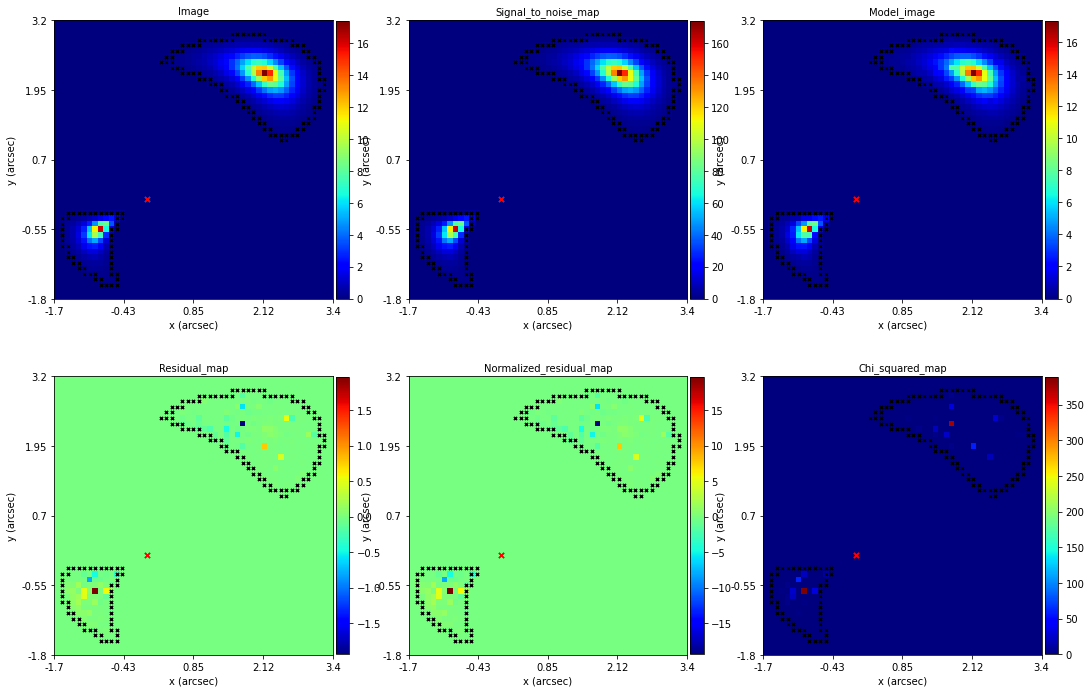

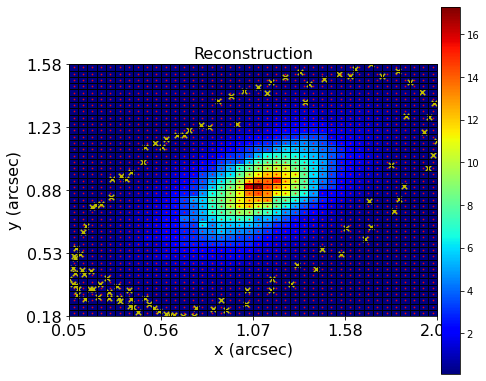

-372.9139114709424

In [21]:
plt.figure(figsize=(10,10))
emcee_model(p0)

## Best likelihood

In [22]:
p0 = best_walker
p0

array([8.63562919e+00, 4.58304840e-02, 1.16953017e-01, 9.57714532e+00,
       4.13508428e-03, 1.35193903e+02, 1.05582123e+00])

ParsDic:
#------------------------------------#
{'ml': 8.63562918797497, 'kappa_s': 0.04583048395971569, 'qDM': 0.1169530171278437, 'log_mbh': 9.57714531787635, 'mag_shear': 0.004135084283691754, 'phi_shear': 135.1939034732883, 'gamma': 1.0558212286387159}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.7905856104340376)
axis_ratio: 0.11695301712784364
phi: 0.0
kappa_s: 0.04583048395971569
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: 272.1642517916455
Log Normalization -1317.2315249194833
Log Evidence: -560.1236148564361
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 1.0558212286387159
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.7905856104340376)
axis_ratio: 0.11695301712784364
phi: 0.0
kappa_s

<Figure size 720x720 with 0 Axes>

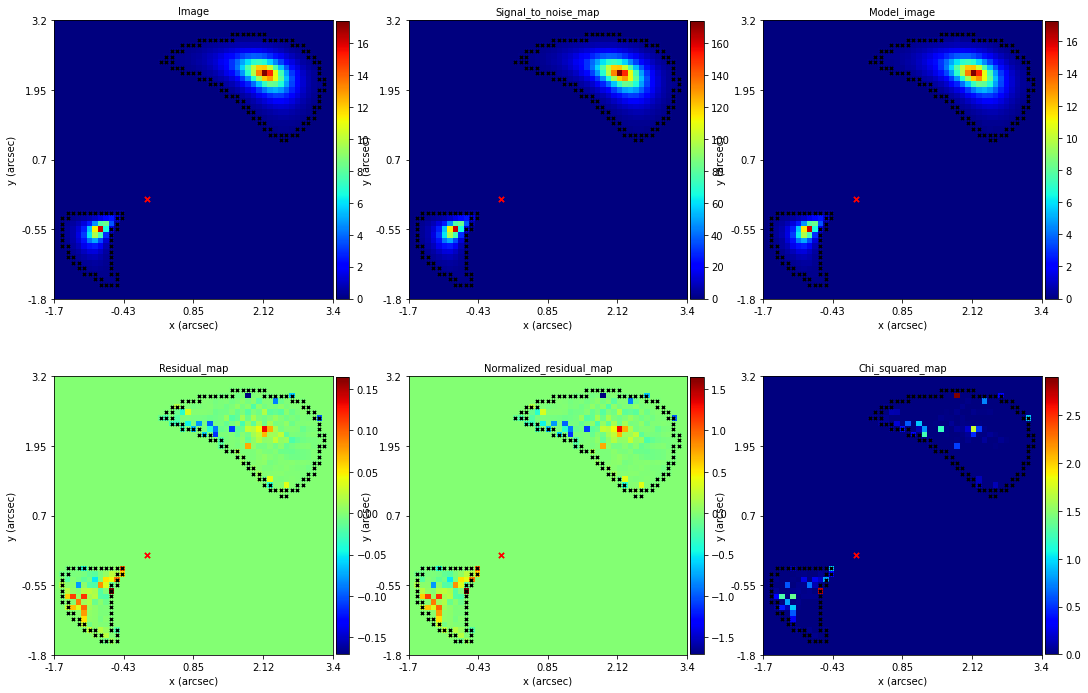

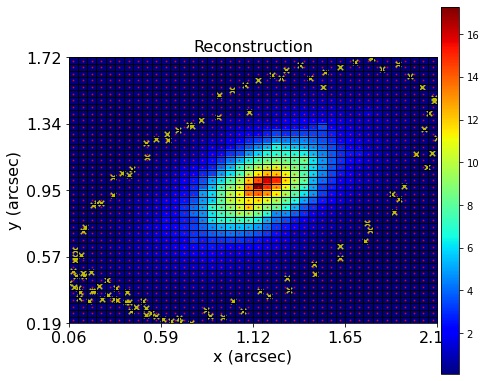

271.54104987829834

In [23]:
plt.figure(figsize=(10,10))
emcee_model(p0)

ParsDic:
#------------------------------------#
{'ml': 7.0, 'kappa_s': 0.075, 'qDM': 0.85, 'log_mbh': 9.0, 'mag_shear': 0.02, 'phi_shear': 88.0, 'gamma': 1.0}


Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.08108108108108109)
axis_ratio: 0.8499999999999999
phi: 0.0
kappa_s: 0.075
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: 169.12855074412096
Log Normalization -1317.2315249194833
Log Evidence: -640.3841621438881
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 1.0
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.08108108108108109)
axis_ratio: 0.8499999999999999
phi: 0.0
kappa_s: 0.075
scale_radius: 11.5
inner_slope: 1.0
z_l: 0.299
z_s: 4.1
critical_density: 2108482862924014.2
surf_lum: [18346.292692  

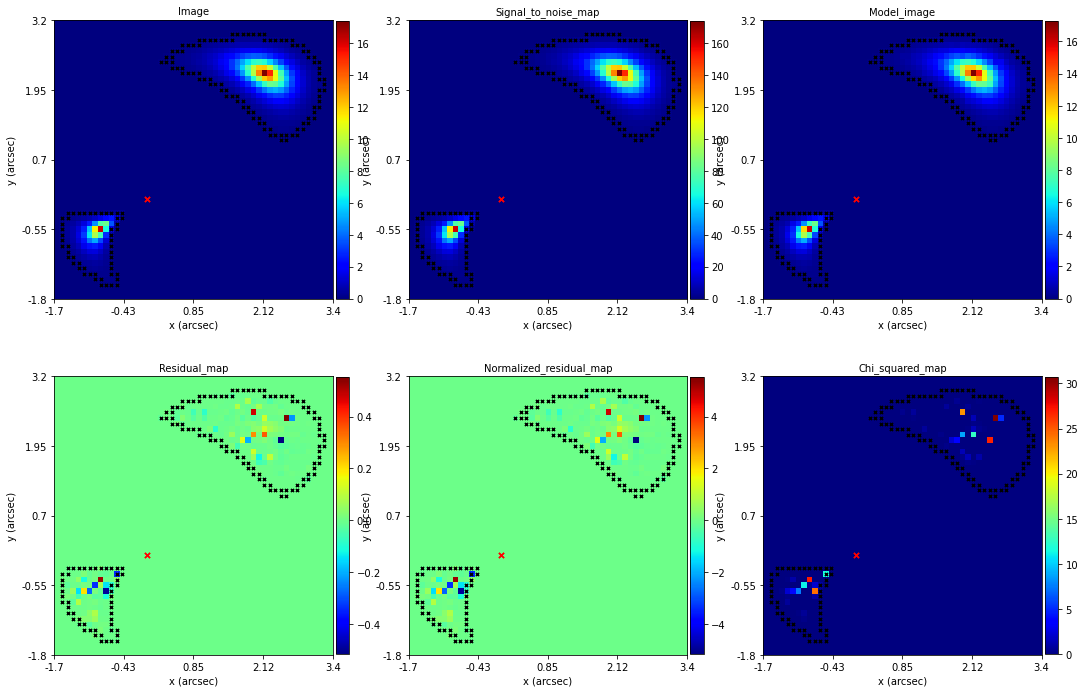

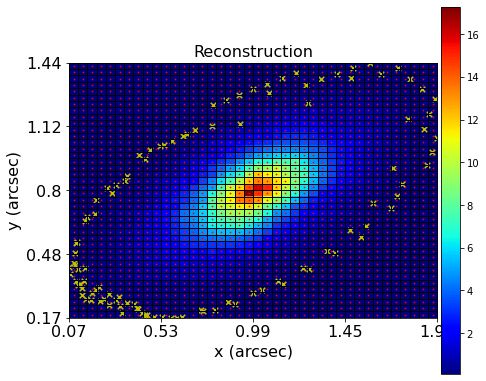

169.12855074412096

In [22]:
# Input
p0 = np.array(([7.0, 0.075, qobs_dm[0], 9.0, 0.02, 88, 1.0]))
emcee_model(p0)

(0.9, 1.1)

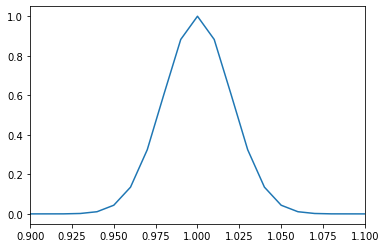

In [54]:
import matplotlib.pyplot as plt
x = np.arange(0, 2, 0.01)
exp = np.e**(-0.5 * (x - 1)**2/0.02**2)
plt.plot(x, exp)
plt.xlim(0.9, 1.1)